In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
import pickle
from sklearn.datasets import load_files
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

## Helper functions

In [2]:
def preprocess_image(filename, target_size = (128, 128, 3)):
    image = imread(filename)
    image_resized = resize(image, target_size)
    return image_resized.flatten()

## Load dataset

In [3]:
dataset = load_files(container_path = '/Users/mt/data/Landmark_Classification/train',
                    load_content = False)
print(dataset.filenames.shape)
print(dataset.target.shape)

(1500,)
(1500,)


In [4]:
class_names = dataset.target_names
class_ids = np.unique(dataset.target)
print(len(class_names))
print(dataset.target_names)
print(class_ids)

30
['bao_tang_ha_noi', 'buu_dien_trung_tam_tphcm', 'cau_long_bien', 'cau_nhat_tan', 'cau_rong', 'cho_ben_thanh_tphcm', 'chua_cau', 'chua_mot_cot', 'chua_thien_mu', 'cot_co', 'hoang_thanh', 'hon_chong_nhatrang', 'landmark81', 'lang_bac', 'lang_khai_dinh', 'mui_ca_mau', 'mui_ke_ga_phanthiet', 'nha_hat_lon_hanoi', 'nha_hat_lon_tphcm', 'nha_tho_da_co_sapa', 'nha_tho_lon_ha_noi', 'quang_truong_lam_vien', 'suoi_tien_tphcm', 'thac_ban_gioc', 'thap_cham', 'thap_rua', 'toa_nha_bitexco_tphcm', 'tuong_chua_kito_vungtau', 'ubnd_tphcm', 'van_mieu']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


## Divide dataset to batches

In [5]:
batch_size = 10
num_batches = num_batches = int(np.ceil(len(dataset.filenames) / batch_size))
X_batches = np.array_split(dataset.filenames, num_batches)
Y_batches = np.array_split(dataset.target, num_batches)
print(len(X_batches))
print(len(Y_batches))

150
150


## Define model

In [6]:
model = SGDClassifier(loss='hinge')

## Train model

In [7]:
for i in range(num_batches):
    filenames = X_batches[i]
    
    X = np.array([preprocess_image(filename) for filename in filenames])
    y = Y_batches[i]
    
    model.partial_fit(X, y, classes=class_ids)

## Validate model

In [8]:
val_dataset = load_files(container_path = '/Users/mt/data/Landmark_Classification/test',
                    load_content = False)

In [10]:
X = np.array([preprocess_image(filename) for filename in val_dataset.filenames])
y = val_dataset.target

In [11]:
y_pred = model.predict(X)
print(accuracy_score(y, y_pred))

0.19066666666666668


## Use model to predict an image

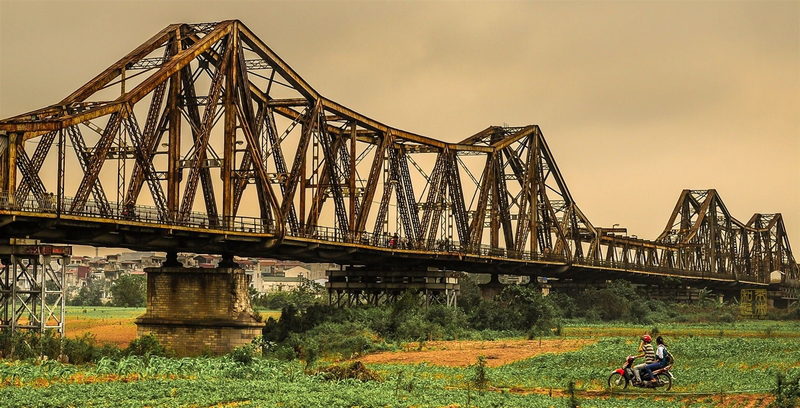

In [14]:
path = '/Users/mt/data/Landmark_Classification/test/cau_long_bien/66ac30c842b1d22e.jpg'
Image.open(path)

In [15]:
tensor = preprocess_image(path)
wrap = tensor.reshape(1, -1)

pred = model.predict(wrap)
pred_class = class_names[pred[0]]
print(pred_class)

cau_long_bien


## Save, Load model

In [87]:
filename = "svm_model.pkl"
with open(filename, "wb") as f:
    pickle.dump(model, f)

model2 = pickle.load(open(filename,"rb"))